# Model Evaluation

This notebook covers the evaluation of the trained machine learning models using various metrics and visualizations for the Wisconsin Breast Cancer dataset.

In [1]:
# Import necessary libraries and functions
import pandas as pd
import numpy as np
import sys
import os

# Get the current notebook's directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct the path to the scripts directory
utils_dir = os.path.join(current_dir, '..', 'scripts')

# Add the utils directory to the system path
sys.path.append(utils_dir)

#Load functions from the script evaluate.py
from evaluate import load_features_data, load_model, load_metrics, plot_confusion_matrices, plot_roc_curves

## Load Preprocessed Data

In [2]:
# Load the preprocessed data
X_test, y_test = load_features_data('../data/selected_features_data.npz')

## Load Trained Models and evaluation metrics

In [3]:
# Load trained models
model_names = ['random_forest_model.pkl', 'gradient_boosting_model.pkl', 'pls_regression_model.pkl', 'neural_network_model.pkl']
models = {
    'Random Forest': load_model('../models/random_forest_model.pkl'),
    'Gradient Boosting': load_model('../models/gradient_boosting_model.pkl'),
    'PLS Regression': load_model('../models/pls_regression_model.pkl'),
    'Neural Network': load_model('../models/neural_network_model.pkl')
}

# Load evaluation metrics
metrics = load_metrics('../results/evaluation_metrics.csv')
metrics

,accuracy,precision,recall,f1_score,roc_auc,confusion_matrix
Random Forest,0.964912,0.953488,0.953488,0.953488,0.997707,"[[69, 2], [2, 41]]"
Gradient Boosting,0.947368,0.930233,0.930233,0.930233,0.995414,"[[68, 3], [3, 40]]"
PLS Regression,0.973684,0.976190,0.953488,0.964706,0.994759,"[[70, 1], [2, 41]]"
Neural Network,0.991228,1.000000,0.976744,0.988235,0.988863,"[[71, 0], [1, 42]]"


## Plot confusion matrices

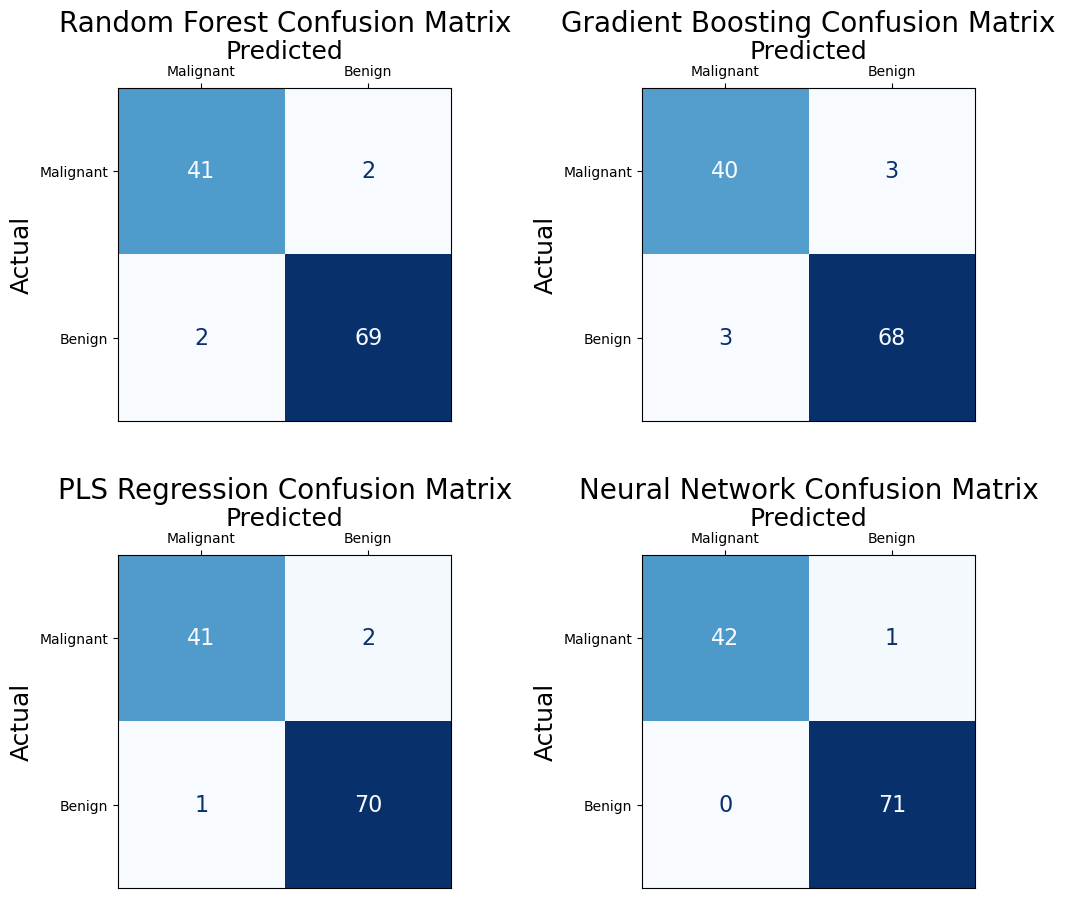

In [4]:
# Plot confusion matrices
plot_confusion_matrices(metrics)

## Plot ROC curves
The ROC curve illustrates the performance of each classifier across all classification thresholds. The ROC AUC (Area Under the Curve) is a measure of the model's ability to distinguish between classes.

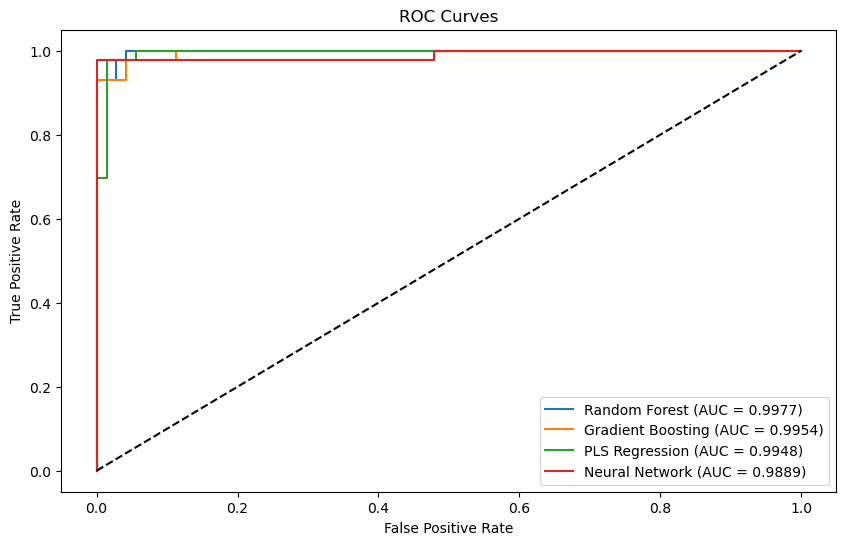

In [5]:
# Plot ROC curves
plot_roc_curves(models, X_test, y_test, metrics)

## Summary

- The Neural Network model demonstrated the highest accuracy (0.991228) and perfect precision (1.000000), making it the most reliable model for this dataset. It also had the highest recall (0.976744), indicating its effectiveness in identifying malignant cases correctly.

- PLS Regression performed very well, with high accuracy and F1 score, and an excellent ROC AUC score. It serves as a strong contender but slightly lagged behind the Neural Network in terms of precision and reca
  
- The Random Forest and Gradient Boosting models both performed exceptionally well, with perfect ROC AUC scores. However, Random Forest had a slightly better balance between precision and recall.

## Conclusion
In conclusion, while all models demonstrated high performance, the Neural Network model stands out as the best-performing model for the Wisconsin Breast Cancer dataset due to its highest accuracy and precision. The Random Forest model also shows robust performance, making it a strong alternative. However, PLS Regression is a noteworthy option for scenarios where computational efficiency and ease of model tuning are important considerations. The importance of high recall in cancer detection cannot be overstated, as it ensures that malignant cases are identified and treated promptly, reducing the risk of missed diagnoses.